## Imports and Helper Functions

In [48]:
import torch
import torchvision
import os
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# helper function to show an image
def matplotlib_imshow(img, one_channel=False, normalized=False):
    if one_channel:
        img = img.mean(dim=0)
    if normalized:
        img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Dataset

In [79]:
class CoreSlices (torch.utils.data.Dataset):
    def __init__(self, img_dir, transform):
        self.img_dir = img_dir
        self.transform = transform

        self.files = sorted(os.listdir(self.img_dir))

    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):

        img_path = os.path.join(self.img_dir, self.files[idx])
        img = read_image(img_path)
        
        #get the root name of the file (no file extension) and extract the label
        label = os.path.splitext(os.path.basename(self.files[idx]))[0].split("_")[-1]
        
        return img, label



'yellow'

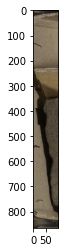

In [80]:
transform = None

slices = CoreSlices("data/slices", transform)
matplotlib_imshow(slices[0][0])
slices[0][1]